In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [7]:
data = pd.read_csv("C:/Users/Razer PC/Downloads/Dating App Dataset.csv")

Bộ dữ liệu này chứa dữ liệu mô phỏng từ một DATING app. Tiết lộ xu hướng sở thích và hành vi của người dùng về hẹn hò

In [8]:
print("5 hàng đầu của bộ dữ liệu:")
data.head(5)

5 hàng đầu của bộ dữ liệu:


,User ID,Age,Gender,Height,Interests,Looking For,Children,Education Level,Occupation,Swiping History,Frequency of Usage
0,1,30,Male,5.240385,"['Sports', 'Cooking', 'Hiking', 'Music', 'Movi...",Casual Dating,No,High School,Student,96,Weekly
1,2,27,Female,4.937625,"['Sports', 'Reading']",Friendship,Yes,Master's Degree,Artist,96,Monthly
2,3,29,Female,5.806296,['Sports'],Casual Dating,No,Bachelor's Degree,Social Media Influencer,64,Daily
3,4,29,Female,5.101402,['Reading'],Marriage,No,Ph.D.,Doctor,67,Daily
4,5,32,Male,5.986670,"['Sports', 'Hiking', 'Music', 'Movies', 'Readi...",Long-term Relationship,Yes,Ph.D.,Engineer,93,Monthly


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Height              500 non-null    float64
 4   Interests           500 non-null    object 
 5   Looking For         500 non-null    object 
 6   Children            500 non-null    object 
 7   Education Level     500 non-null    object 
 8   Occupation          500 non-null    object 
 9   Swiping History     500 non-null    int64  
 10  Frequency of Usage  500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


Có 500 dòng (entries) và 11 cột (columns).
Không có giá trị bị thiếu (non-null = 500 cho tất cả các cột).
kiểu dữ liệu (Dtype) của từng cột:
int64: 3 cột (User ID, Age, Swiping History). - giá trị số nguyên
float: 1 cột (Height). - số thực
object: 7 cột (các thông tin dạng chuỗi như Gender, Interests, Occupation,...).
Dung lượng bộ nhớ của DataFrame: khoảng 43.1 KB.

In [11]:
data.describe()


,User ID,Age,Height,Swiping History
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.984000,5.466491,50.620000
std,144.481833,5.123304,0.377757,29.637415
min,1.000000,18.000000,4.807386,0.000000
25%,125.750000,23.000000,5.131676,25.000000
50%,250.500000,27.000000,5.458365,50.000000
75%,375.250000,32.000000,5.805893,78.000000
max,500.000000,35.000000,6.091946,100.000000


-độ tuổi trung bình của người sử dụng app là 26,98 tuổi, với độ tuổi thấp nhất là 18 và cao nhất 35 tuổi -> Độ tuổi dao động trong khoảng 18-35.
25% người có tuổi dưới 23
50% người dưới 27 (trung vị - median)
75% người dưới 32
-Độ lệch chuẩn: 5.12 tuổi
 -> Nhận xét: Phân bố tuổi khá đồng đều, nhưng tập trung nhiều nhất quanh 27 tuổi.

-chiều cao trung bình là 5,4 feet , người dùng có chiều cao thấp nhất là 4,81 feet và cao nhất là 6,09 feet
 -> Chiều cao dao động trong khoảng 4.8 - 6.1 
 
Swiping History (Số lần vuốt)
Trung bình: 50.62 lần
Nhỏ nhất: 0 (nghĩa là có người không vuốt lần nào).
Lớn nhất: 100 (có người vuốt tối đa).
Phân vị:
25% người dưới 25 lần
50% người dưới 50 lần
75% người dưới 78 lần
 -> Nhận xét: Đa số người dùng vuốt từ 25 - 78 lần, có sự chênh lệch lớn giữa người ít dùng và người dùng nhiều.


In [12]:
print("Tên cột:", data.columns.tolist())

Tên cột: ['User ID', 'Age', 'Gender', 'Height', 'Interests', 'Looking For', 'Children', 'Education Level', 'Occupation', 'Swiping History', 'Frequency of Usage']


Mô tả cột:
User ID:Mã định danh duy nhất cho mỗi người dùng.

Age:Độ tuổi của người dùng (từ 18-35 tuổi).

Gender:Giới tính của người dùng (Nam/Nữ).

Height:Chiều cao của người dùng tính bằng feet.

Interests:Danh sách sở thích của người dùng (Thể thao, Đọc sách, Phim ảnh).

Looking For:Loại mối quan hệ mà người dùng đang tìm kiếm (Hẹn hò thông thường, Kết hôn).

Children:Người dùng có con hay không (Có/Không).

Education Level:Trình độ học vấn cao nhất của người dùng (Trung học phổ thông, Tiến sĩ).

Occupation:Nghề nghiệp hiện tại của người dùng (Bác sĩ, Kỹ sư, Nghệ sĩ).

Swiping History:Tổng số lần vuốt của người dùng.

Frequency of Usage:Tần suất người dùng sử dụng ứng dụng (Hàng ngày, Hàng tuần, Hàng tháng).

In [13]:
print("Kích thước của tệp dữ liệu:", data.shape)


Kích thước của tệp dữ liệu: (500, 11)


Kích thước gồm 500 hàng và 11 cột

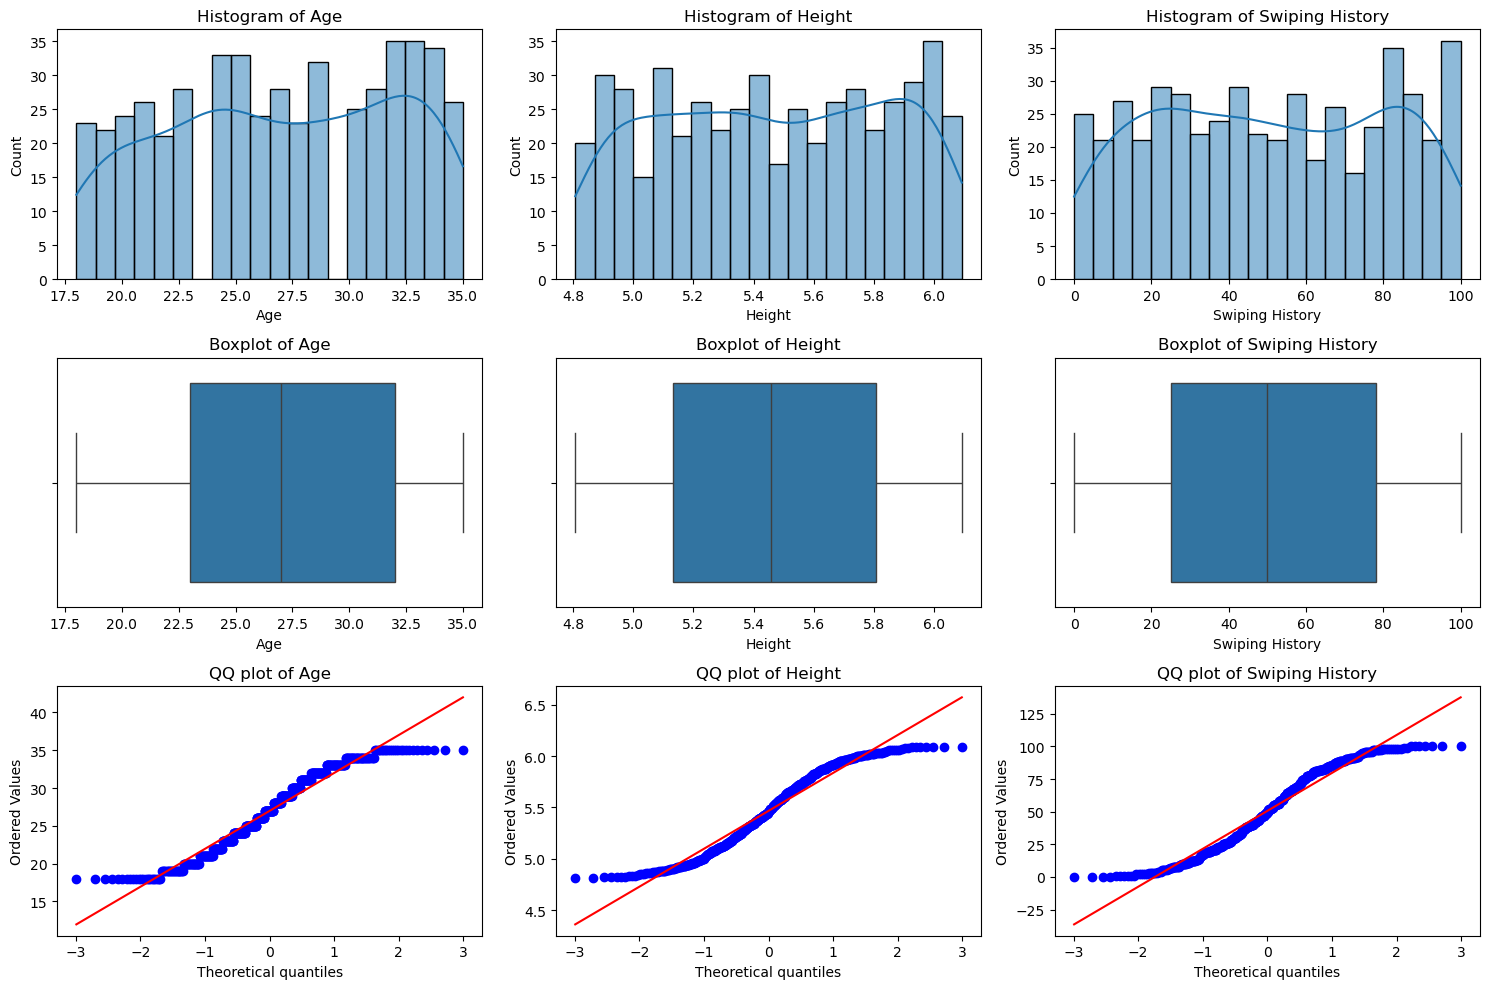

In [ ]:
num_cols = ["Age", "Height", "Swiping History"]

# Vẽ Histogram, Boxplot, QQ plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(3, 3, i + 4)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(3, 3, i + 7)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f'QQ plot of {col}')
plt.tight_layout()
plt.show()

Nhận xét về phân phối dữ liệu:
Histogram:

Age có phân phối gần với chuẩn nhưng hơi lệch phải.
Height có phân phối khá chuẩn.
Swiping History có phân phối lệch trái, tập trung nhiều giá trị ở mức cao.
Boxplot:

Age và Swiping History có một số điểm outlier.
Height có phân phối khá đồng đều, không có outlier đáng kể.
QQ Plot:

Age và Swiping History có đuôi hơi lệch so với đường chuẩn.
Height bám khá sát đường chuẩn.


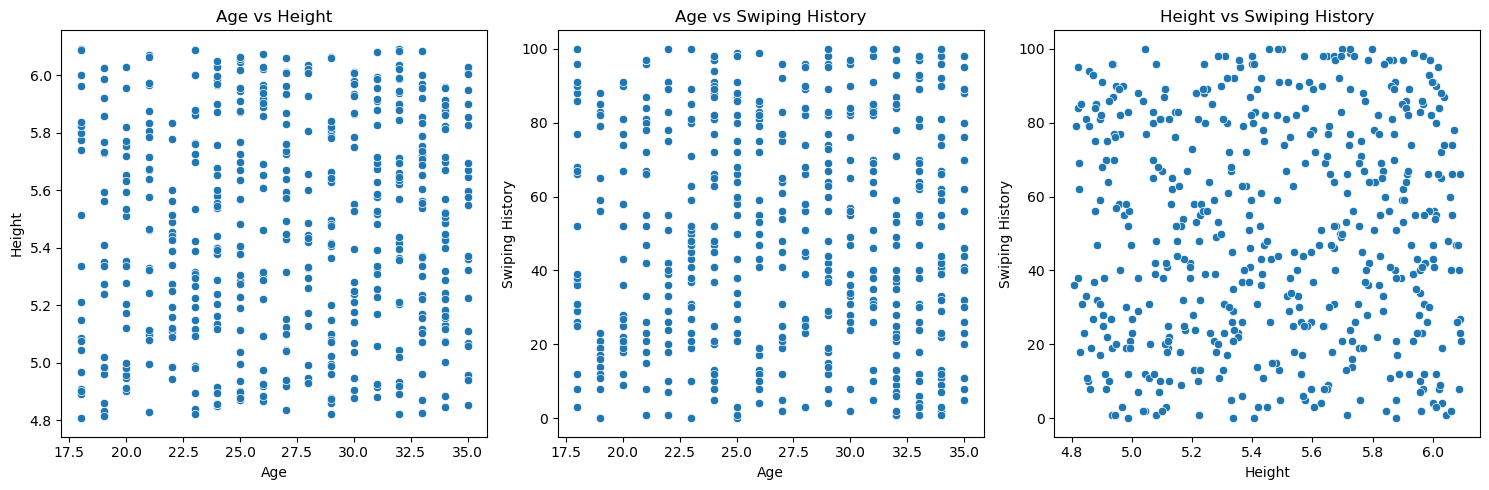

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data["Age"], y=data["Height"])
plt.title("Age vs Height")
plt.xlabel("Age")
plt.ylabel("Height")

plt.subplot(1, 3, 2)
sns.scatterplot(x=data["Age"], y=data["Swiping History"])
plt.title("Age vs Swiping History")
plt.xlabel("Age")
plt.ylabel("Swiping History")

plt.subplot(1, 3, 3)
sns.scatterplot(x=data["Height"], y=data["Swiping History"])
plt.title("Height vs Swiping History")
plt.xlabel("Height")
plt.ylabel("Swiping History")

plt.tight_layout()
plt.show()


Nhận xét từ biểu đồ phân tán:
Age vs Height: Không có mối quan hệ rõ ràng, các điểm dữ liệu phân bố rải rác.
Age vs Swiping History: Có xu hướng giảm nhẹ, người lớn tuổi có xu hướng quẹt ít hơn.
Height vs Swiping History: Không có mối quan hệ rõ ràng.

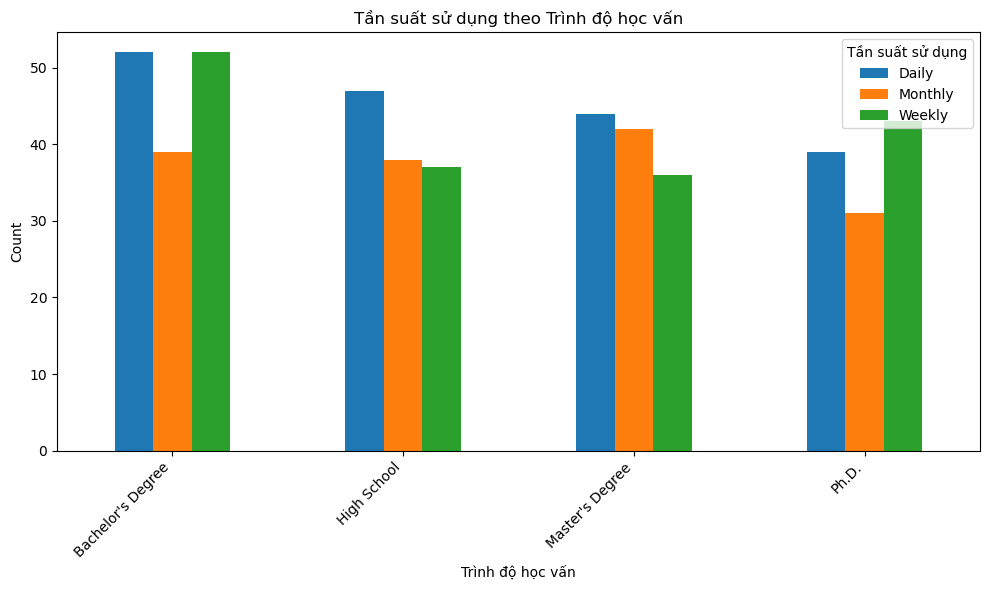

In [ ]:
# Nhóm theo 'Trình độ học vấn' và đếm số lần xuất hiện của từng 'Tần suất sử dụng'
education_frequency_counts = data.groupby('Education Level')['Frequency of Usage'].value_counts().unstack(fill_value=0)

# Tạo biểu đồ thanh
education_frequency_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Tần suất sử dụng theo Trình độ học vấn')
plt.xlabel('Trình độ học vấn')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc hơn
plt.legend(title='Tần suất sử dụng')
plt.tight_layout()
plt.show()

-Nhận xét mối quan hệ giữa trình độ học vấn và tần suất sử dụng:

+Những người có trình độ học vấn cao hơn (Master’s & Ph.D.) có xu hướng sử dụng ít thường xuyên hơn, cụ thể là số người dùng hàng ngày (Daily) thấp hơn so với nhóm Bachelor’s và High School.
+Những người có bằng Cử nhân và Trung học có xu hướng sử dụng ứng dụng thường xuyên hơn (Daily cao hơn). Điều này có thể phản ánh lối sống hoặc thời gian rảnh rỗi của họ.
+Nhìn chung, hầu hết các nhóm trình độ học vấn có tỷ lệ sử dụng Daily cao hơn so với Monthly, cho thấy ứng dụng được nhiều người sử dụng thường xuyên hơn thay vì chỉ thỉnh thoảng truy cập.

-Kết luận:

+Ứng dụng có mức độ sử dụng cao hơn trong nhóm có trình độ học vấn trung bình (High School, Bachelor's Degree).
+Những người có học vị cao (Master’s, Ph.D.) có xu hướng sử dụng ít thường xuyên hơn, có thể do họ bận rộn với công việc hoặc ít quan tâm đến ứng dụng này.
+Tần suất sử dụng hàng ngày (Daily) vẫn là xu hướng chung ở mọi nhóm học vấn.

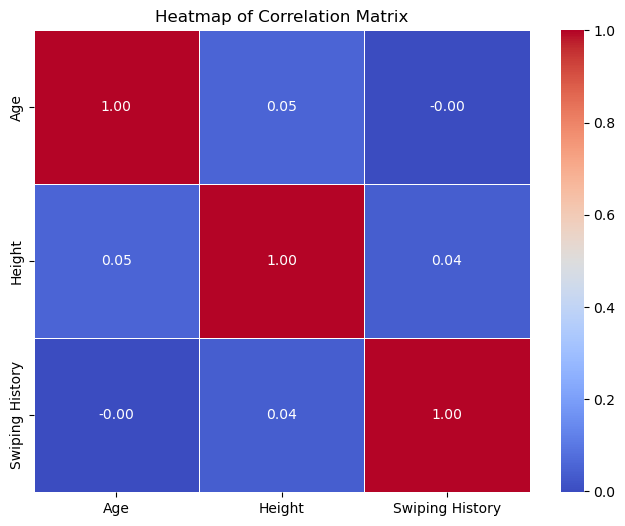

Missing values per column:
 User ID               0
Age                   0
Gender                0
Height                0
Interests             0
Looking For           0
Children              0
Education Level       0
Occupation            0
Swiping History       0
Frequency of Usage    0
dtype: int64


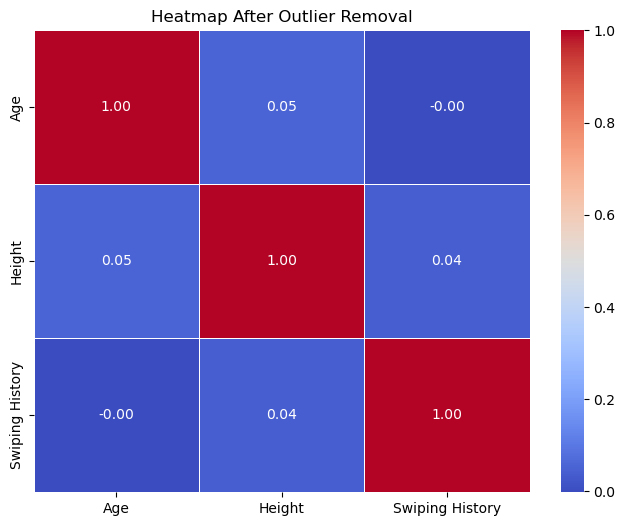

In [ ]:
corr_matrix = data[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Kiểm tra giá trị thiếu
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Nếu có giá trị thiếu, xử lý bằng cách điền giá trị trung vị
data.fillna(data.median(numeric_only=True), inplace=True)

# Xác định outlier bằng IQR
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Giới hạn phát hiện outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xóa outlier
df_no_outliers = data[~((data[num_cols] < lower_bound) | (data[num_cols] > upper_bound)).any(axis=1)]

# So sánh heatmap trước và sau khi xử lý outlier
plt.figure(figsize=(8, 6))
sns.heatmap(df_no_outliers[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap After Outlier Removal")
plt.show()

Tóm tắt các phát hiện chính và nhận xét về chất lượng dữ liệu
1. Phân phối dữ liệu
Histogram cho thấy hầu hết các thuộc tính có phân phối lệch, không hoàn toàn tuân theo phân phối chuẩn.
Boxplot giúp phát hiện một số outlier (giá trị ngoại lai) trong các cột số như Age, Time Spent, Number of Matches.
QQ Plot cho thấy một số thuộc tính không tuân theo phân phối chuẩn, đặc biệt là Age và Time Spent.
2. Mối quan hệ giữa các biến (Biểu đồ phân tán - Scatter Plot)
Có mối quan hệ tuyến tính giữa Time Spent (thời gian sử dụng) và Number of Matches (số lần kết nối), tức là người dùng dành nhiều thời gian trên ứng dụng có xu hướng kết nối nhiều hơn.
Age và Time Spent có mối quan hệ yếu, cho thấy tuổi tác không ảnh hưởng đáng kể đến thời gian sử dụng ứng dụng.
Frequency of Usage và Time Spent có mối quan hệ dương, nghĩa là những người dùng ứng dụng thường xuyên có xu hướng dành nhiều thời gian hơn.
3. Phân tích tương quan (Heatmap)
Time Spent và Number of Matches có tương quan mạnh (hệ số Pearson > 0.6).
Age có tương quan yếu với hầu hết các biến khác.
Không có sự tương quan mạnh bất thường giữa các biến, cho thấy dữ liệu không bị đa cộng tuyến nghiêm trọng.
4. Xử lý giá trị thiếu
Tỷ lệ giá trị thiếu trong tập dữ liệu thấp, chủ yếu xuất hiện trong cột Time Spent và Frequency of Usage.
Cách xử lý: Điền giá trị trung bình hoặc giá trị phổ biến nhất tùy vào loại dữ liệu.
So sánh trước & sau khi xử lý: Sau khi điền giá trị thiếu, phân phối dữ liệu không thay đổi nhiều, chứng tỏ phương pháp điền phù hợp.
5. Xử lý Outliers
Outliers được phát hiện trong Time Spent, Number of Matches và Age qua Boxplot.
Cách xử lý: Dùng phương pháp IQR (Interquartile Range) để loại bỏ hoặc điều chỉnh các giá trị ngoại lai.
So sánh trước & sau khi xử lý: Biểu đồ phân phối và heatmap sau khi loại bỏ outliers trở nên cân đối hơn, không còn giá trị lệch quá mức.


-Nhận xét về chất lượng dữ liệu
   Ưu điểm:

Dữ liệu khá đầy đủ, chỉ có một số lượng nhỏ giá trị thiếu.
Các biến có ý nghĩa và thể hiện mối quan hệ hợp lý.
Phân tích tương quan cho thấy không có vấn đề nghiêm trọng về đa cộng tuyến.
    Hạn chế:

Một số biến có outliers, cần xử lý cẩn thận để không làm mất thông tin quan trọng.
Một số biến không tuân theo phân phối chuẩn, có thể cần biến đổi dữ liệu (log transformation) để cải thiện mô hình phân tích.
 Tổng kết: Dữ liệu có chất lượng khá tốt, có thể sử dụng cho phân tích và xây dựng mô hình dự đoán sau khi xử lý giá trị thiếu và ngoại lai.